In [1]:
import skimage.io
import cv2
from matplotlib import pyplot as plt
import numpy as np
import skimage.filters

with conversion to 8 bit

(2054, 2456)


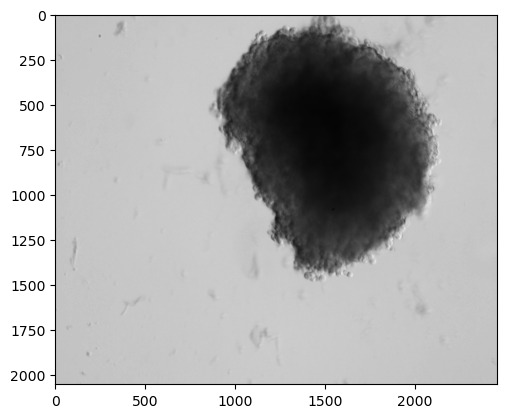

In [2]:
#path = r'C:\Users\k54739\Bibin\thesis\Data_supervised\single_dose\D08-T01.tiff'
path = r'C:\Users\k54739\Bibin\thesis\drug_screened\B02-T01.tiff'
image = skimage.io.imread(path)

# Convert to gray 
if len(image.shape) == 3: 
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else: 
    img_gray = image

# Convert to 8-bit format
img_gray_8bit = cv2.normalize(img_gray, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
print(img_gray_8bit.shape)
plt.subplots()
plt.imshow(img_gray_8bit, cmap="gray")



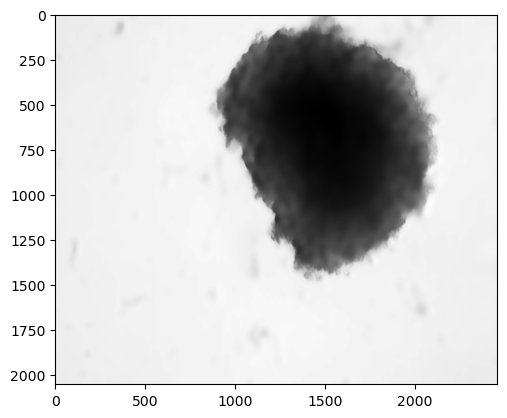

In [3]:
# Blur using bilateral filter
blur = cv2.bilateralFilter(img_gray_8bit, 50, 40, 40)

plt.subplots()
plt.imshow(blur, cmap="gray")
plt.show()


(0.0, 256.0)

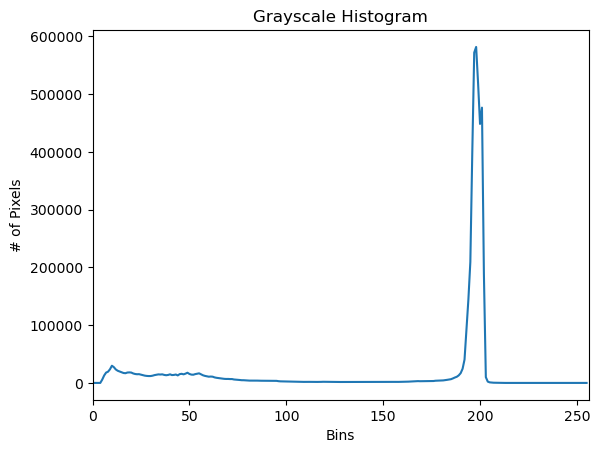

In [4]:
hist = cv2.calcHist([blur], [0], None, [256], [0, 256])
# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
#plt.subplots()

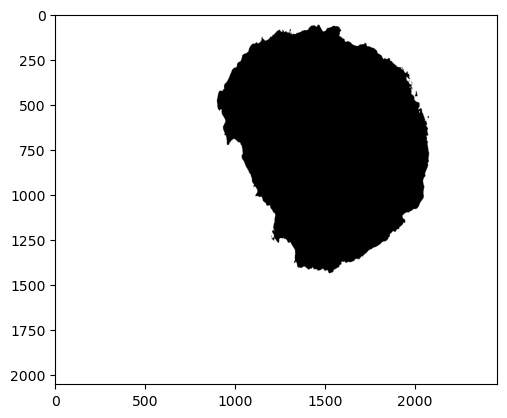

In [5]:
t = skimage.filters.threshold_otsu(blur)
binary_mask = blur > t

plt.subplots()
plt.imshow(binary_mask,cmap="gray")

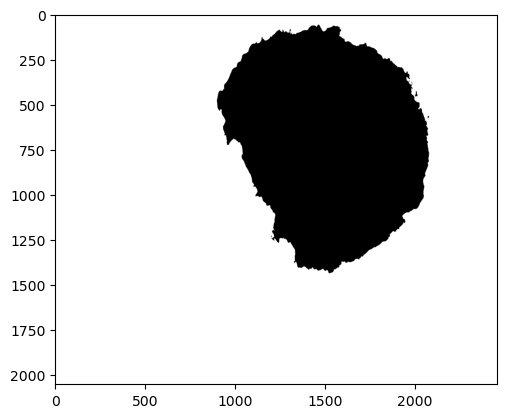

In [6]:
#remove small objects 
filtered_mask = skimage.morphology.remove_small_objects(binary_mask,10000)
plt.subplots()
plt.imshow(filtered_mask,cmap="gray")

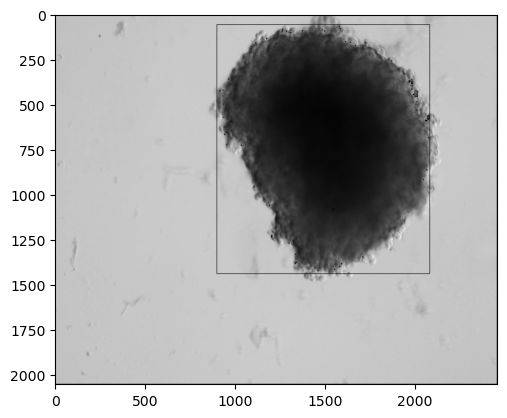

In [7]:
filtered_mask_uint8= np.asarray(filtered_mask, dtype="uint8")
contours, hierarchy = cv2.findContours(filtered_mask_uint8, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    rect = cv2.boundingRect(c)
    x,y,w,h = rect
    cv2.rectangle(img_gray_8bit,(x,y),(x+w,y+h),(0,255,0),2)
plt.subplots()
plt.imshow(img_gray_8bit,cmap="gray")


In [8]:
print(w)
print(h)
print(x)
print(y)

1183
1383
899
58


In [9]:
max_value = max(w, h)
size = max_value + 400
new_x = x + (w - size) // 2  # Center the square box
new_y = y + (h - size) // 2  # Center the square box


In [10]:
print(size)
print(new_x)
print(new_y)

1783
599
-142


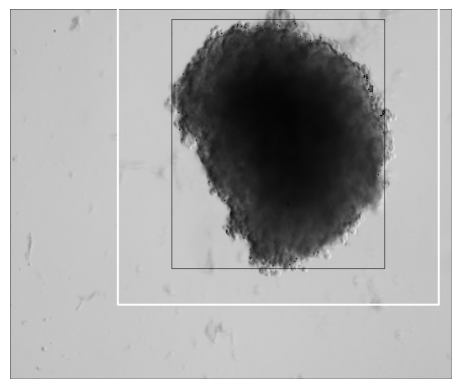

In [11]:
# Draw the rectangle on the image (white color in BGR format)
cv2.rectangle(img_gray_8bit, (new_x, new_y), (new_x + size, new_y + size), (255, 255, 255), thickness=10)

# Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
image_rgb = cv2.cvtColor(img_gray_8bit, cv2.COLOR_BGR2RGB)

# Display the image with matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()


In [12]:
import tifffile as tiff

In [14]:
image = tiff.imread(path)
pixel_min = np.min(image)
pixel_max = np.max(image)

print(f"Range: {pixel_min} - {pixel_max}") 


Range: 6993 - 39417


In [15]:
def count_unique_per_channel(image):
    unique_counts = []
    for channel in range(image.shape[0]):  # Loop through each channel (you know it's 3 channels)
        unique_vals = np.unique(image[channel])
        unique_counts.append(len(unique_vals))
    return unique_counts

# Count unique pixels per channel
unique_per_channel = count_unique_per_channel(image)

# Print the result
print("Unique pixel counts per channel:")
for i, count in enumerate(unique_per_channel):
    print(f"Channel {i+1}: {count}")

Unique pixel counts per channel:
Channel 1: 1928
Channel 2: 1938
Channel 3: 1949


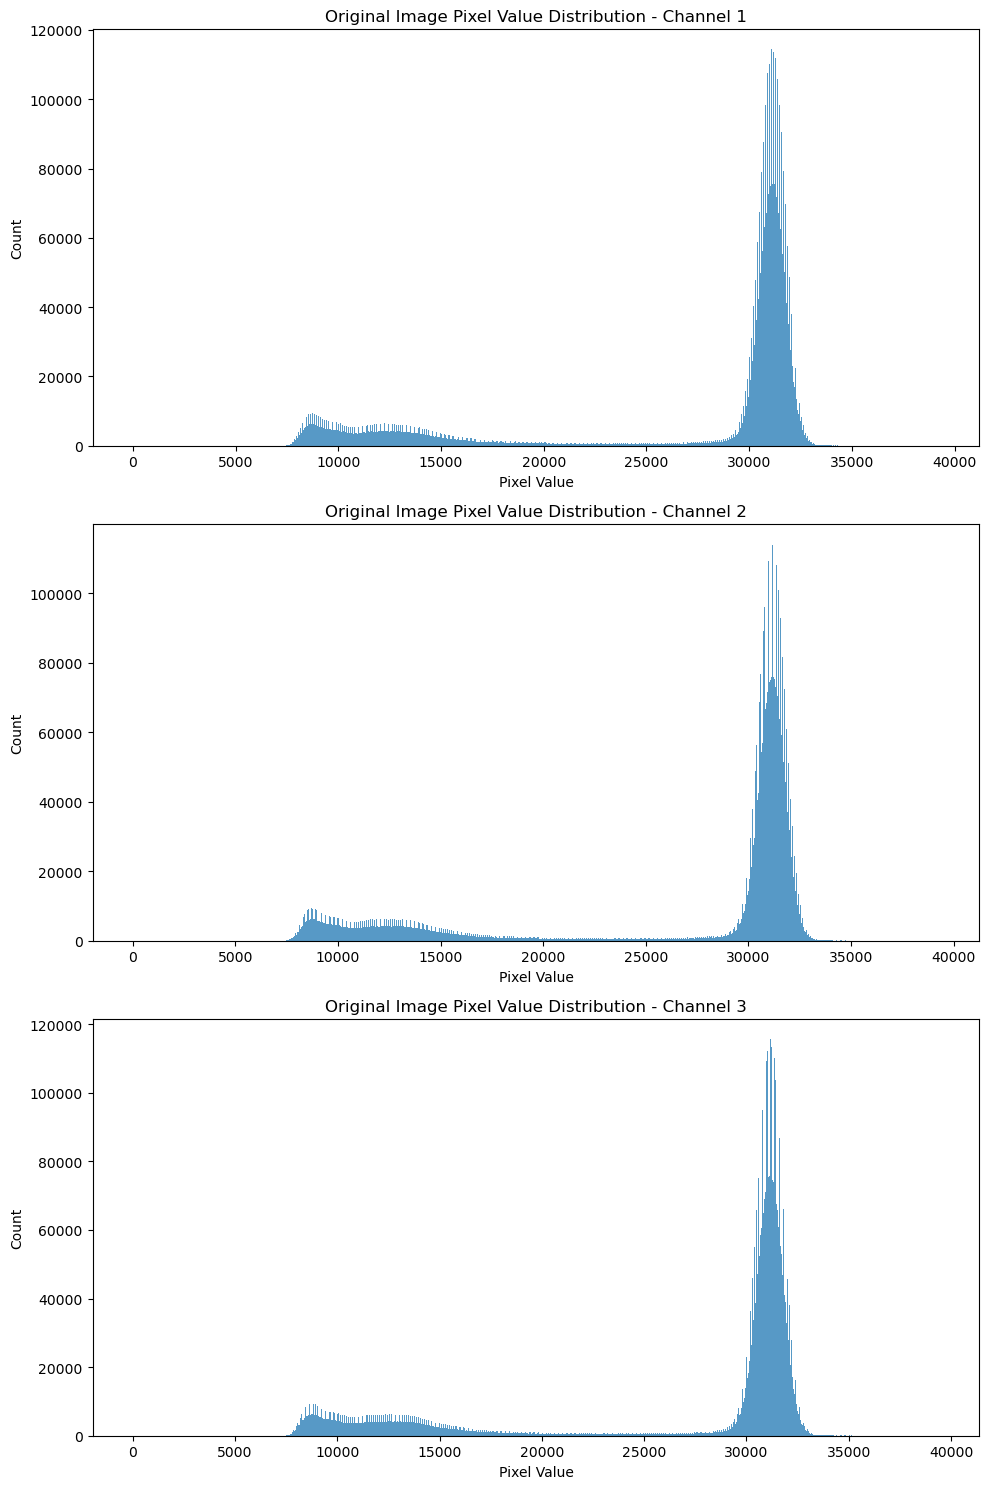

In [16]:
# Function to plot pixel value distribution by channel
def plot_pixel_value_distribution_by_channel(image, title, axs, bins=1024):
    for channel in range(image.shape[0]):
        pixel_values = image[channel].flatten()  # Flatten to 1D
        axs[channel].hist(pixel_values, bins=bins, range=(0, np.max(pixel_values)), alpha=0.75)
        axs[channel].set_title(f"{title} - Channel {channel+1}")
        axs[channel].set_xlabel('Pixel Value')
        axs[channel].set_ylabel('Count')

# Set up the subplots (3 channels = 3 plots)
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot original image pixel value distribution for each channel
plot_pixel_value_distribution_by_channel(image, 'Original Image Pixel Value Distribution', axs, bins=1024)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [17]:
# Ensure the image has 3 layers (channels)
if image.shape[0] != 3:
    raise ValueError(f"Image {img_path} does not have exactly 3 layers.")

# Normalize the 16-bit image to [0, 1]
#image = image.astype(np.float32)/65535.0

# Correctly extract the height and width from the shape
no_of_channel = image.shape[0]
height, width = image.shape[1], image.shape[2]
print(image.shape)
print(f"Height: {height}, Width: {width}")
print(f"no of channels:{no_of_channel}")

(3, 2054, 2456)
Height: 2054, Width: 2456
no of channels:3


# Convert to a torch tensor
image = torch.tensor(image, dtype=torch.float32)
print()
transform = v2.Compose([
    v2.crop([v2.crop,new_y:new_y + size, new_x:new_x + size] ),
])

image_croped = transform(original_image_tensor)

#save cheyth stroiyunnathan presnam enkil border value mathram saviya ennit tiff loadakkumbo transformil kodkka.

In [18]:

# Ensure that new_x, new_y, size are within bounds
new_x = max(0, new_x)
new_y = max(0, new_y)
new_size = min(size, width - new_x, height - new_y)
print(new_x)
print(new_y)
print(new_size)

599
0
1783


In [19]:
# Ensure the crop size and coordinates are valid
if size > 0 and new_y + size <= image.shape[1] and new_x + size <= image.shape[2]:
    # Crop the image based on the calculated square dimensions
    cropped_image = image[:, new_y:new_y + size, new_x:new_x + size]  # Including all channels
    # Multiply by 65535 to restore the original 16-bit scale

    #cropped_image_16bit = (cropped_image * 65535.0).astype(np.uint16)

    # Save the cropped image as a TIFF file
    output_path = r'C:\Users\k54739\cropped_image.tiff'
    tiff.imwrite(output_path, cropped_image)

    print(f"Cropped image saved as {output_path}")
else:
    print("Invalid crop size or coordinates. The cropping box is out of bounds.")


Cropped image saved as C:\Users\k54739\cropped_image.tiff


In [20]:
crop_image = tiff.imread(output_path)

In [21]:
# Get the data type (e.g., uint8, uint16, etc.)
data_type = crop_image.dtype

# Get the image height and width
height, width = crop_image.shape[1], crop_image.shape[2]

# Get the range of pixel values
pixel_min = np.min(crop_image)
pixel_max = np.max(crop_image)

# Print the results
print(f"Data Type: {data_type}")
print(f"Height: {height}")
print(f"Width: {width}")
print(f"Range: {pixel_min} - {pixel_max}")
print(crop_image.shape)

Data Type: uint16
Height: 1783
Width: 1783
Range: 6993 - 39417
(3, 1783, 1783)


In [22]:
# Load the 3-channel grayscale image
crop_image = tiff.imread(output_path)

# Count unique pixels per channel
unique_per_channel = count_unique_per_channel(crop_image)

# Print the result
print("Unique pixel counts per channel:")
for i, count in enumerate(unique_per_channel):
    print(f"Channel {i+1}: {count}")

Unique pixel counts per channel:
Channel 1: 1928
Channel 2: 1938
Channel 3: 1949


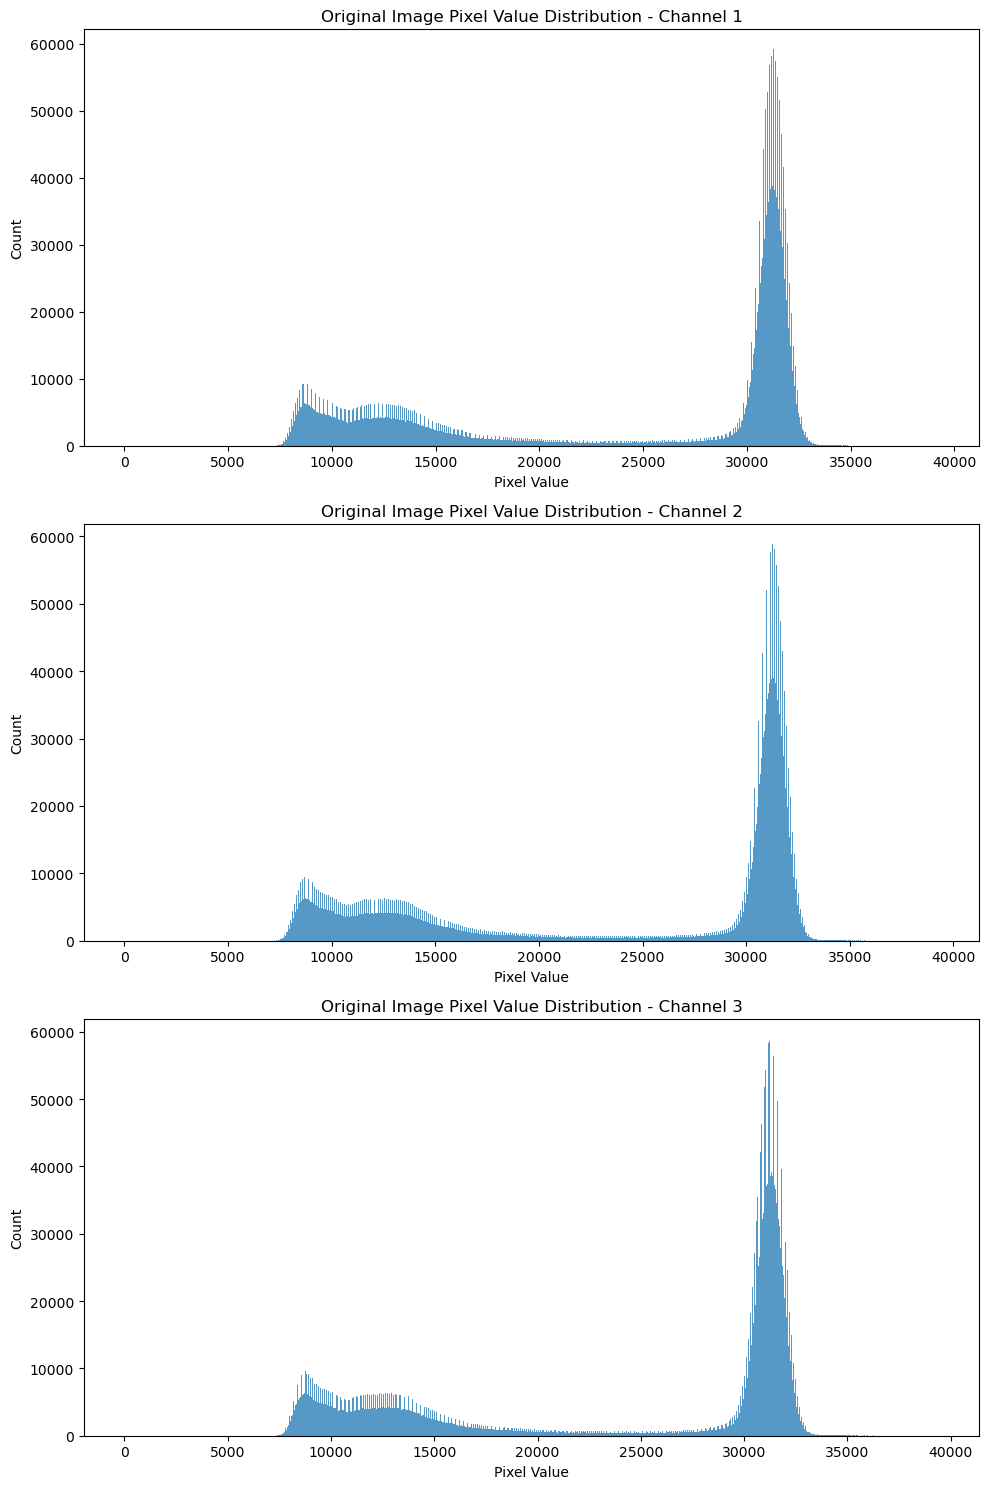

In [23]:



# Load the 3-channel grayscale image
crop_image = tiff.imread(output_path)

# Set up the subplots (3 channels = 3 plots)
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot original image pixel value distribution for each channel
plot_pixel_value_distribution_by_channel(crop_image, 'Original Image Pixel Value Distribution', axs, bins=1024)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
